#Индивидуальное задание
##Цель:выполнить полноценный исследовательский анализ данных (EDA),применяя методы выявления и обработки пропусков, выбросов, масштабирования числовых признаков и кодирования категориальных переменных.
##Условия выполнения:
1. Выберите реальный табличный датасет со структурой не менее 8
признаков и целевым признаком, подходящим для задач регрессии или
классификации.
Возможные варианты:
датасеты с платформ Kaggle, UCI, OpenML;
встроенные датасеты из библиотек sklearn , seaborn ;
или запросите рекомендованный набор у преподавателя.
2. Убедитесь, что в датасете присутствуют:
числовые признаки,
категориальные признаки,
целевой столбец (предсказуемый признак),
необязательно: пропущенные значения или выбросы.
##Требования к выполнению:
Выполните последовательные шаги исследовательского анализа:
#1.Обзор структуры данных
- Загрузите датасет.
- Выведите общую информацию ( .info() , .describe() ).
- Опишите: сколько признаков, каких типов, какова структура целевого признака
#2. Обнаружение и обработка пропусков
- Определите, есть ли пропущенные значения.
- Обоснуйте выбранный способ их устранения (удаление, заполнение средним/модой и т.д.).
- Примените выбранный способ
#3. Обнаружение и удаление выбросов
- Выберите 3–5 числовых признаков.
- Используя метод IQR, удалите выбросы.
- Сравните объём данных до и после очистки.
#4. Масштабирование числовых признаков
- Выполните стандартизацию (z-преобразование) с помощью StandardScaler .
- Объясните, зачем выполняется масштабирование
#5. Кодирование категориальных признаков
- Выполните:
   - Label Encoding для порядковых признаков (при наличии);
   - One-Hot Encoding для номинальных признаков.
- Проверьте, исключена ли дамми-ловушка.
#6. Финальный набор данных
- Убедитесь, что датасет не содержит пропусков, выбросов, категориальных
данных в строковом виде.
- Признаки приведены к числовому виду, масштабированы.
- Представьте итоговый DataFrame , готовый к использованию в моделях

#1. Обзор структуры данных

In [14]:
!pip install -q kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
!mkdir -p ~/.kaggle
!echo '{"username":"yourusername","key":"yourkey"}' > ~/.kaggle/kaggle.json  # Замените на свои данные
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip -q heart-failure-prediction.zip
df = pd.read_csv('heart.csv')
print("Исходный размер данных:", df.shape)
print("\nПервые 5 строк данных:")
display(df.head())

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Исходный размер данных: (918, 12)

Первые 5 строк данных:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
print("\n=== Информация о датасете ===")
df.info()
print("\n=== Статистическое описание ===")
display(df.describe(include='all').T)
print("\n=== Распределение целевой переменной ===")
print(df['HeartDisease'].value_counts(normalize=True))


=== Информация о датасете ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

=== Статистическое описание ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2



=== Распределение целевой переменной ===
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


#2. Обнаружение и обработка пропущенных значений

In [16]:
print("\n=== Пропущенные значения ===")
print(df.isnull().sum())


=== Пропущенные значения ===
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#3. Обнаружение и удаление выбросов

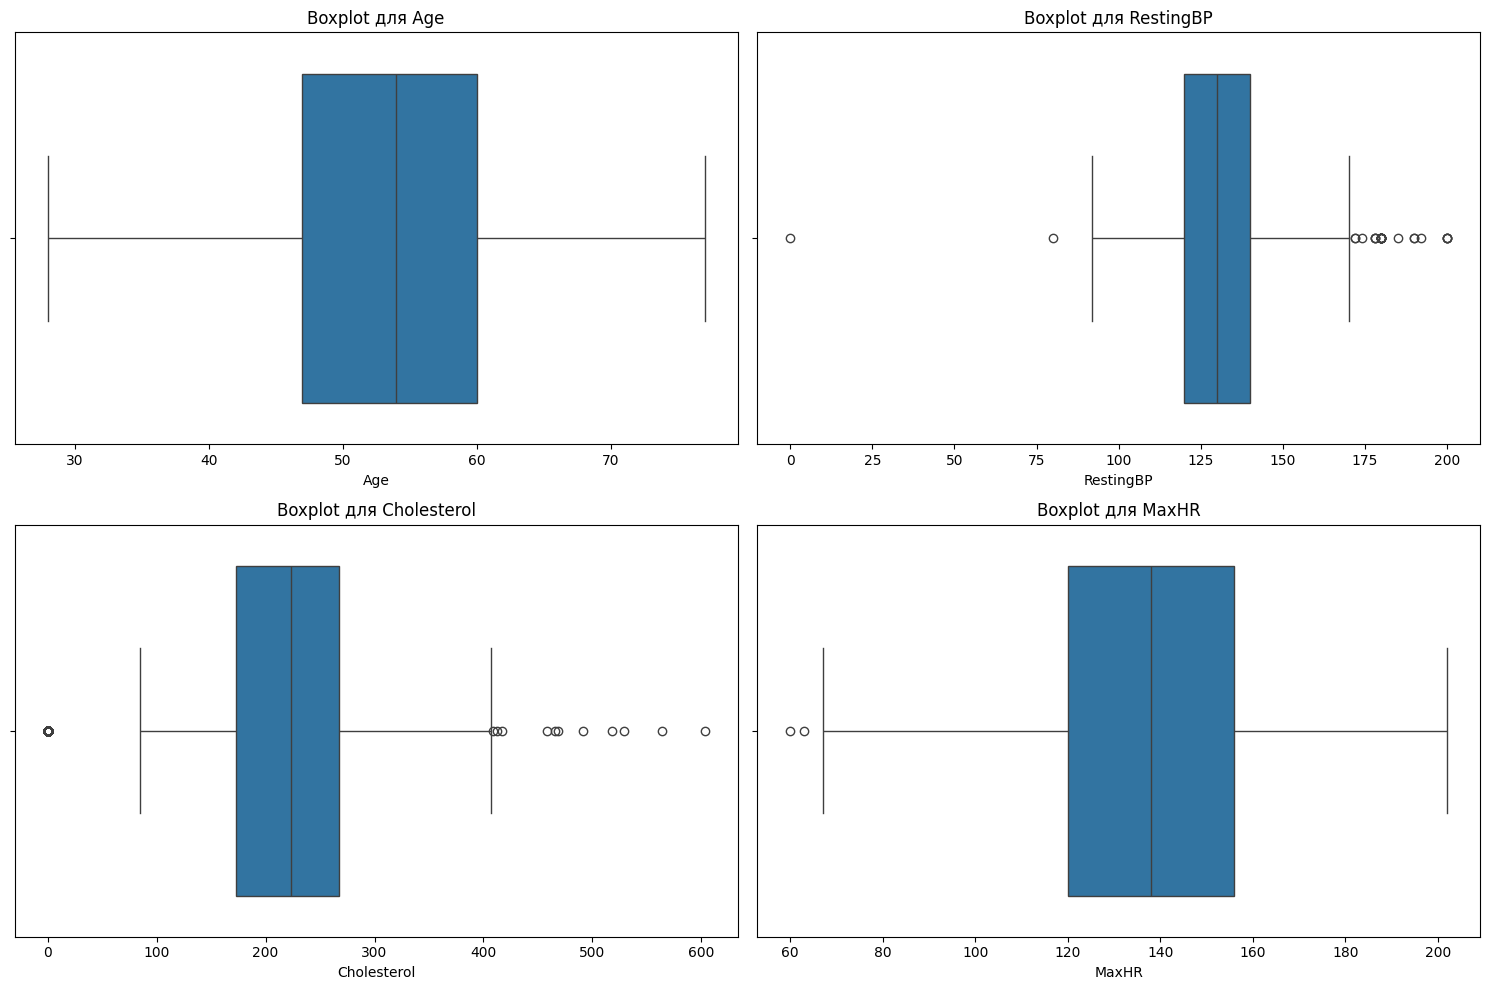


Удалено записей: 205
Новый размер данных: (713, 12)


In [17]:
# Визуализация выбросов
plt.figure(figsize=(15, 10))
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot для {feature}')
plt.tight_layout()
plt.show()

# Удаление выбросов методом IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers(df, features)
print(f"\nУдалено записей: {len(df) - len(df_clean)}")
print(f"Новый размер данных: {df_clean.shape}")

#4. Масштабирование числовых признаков

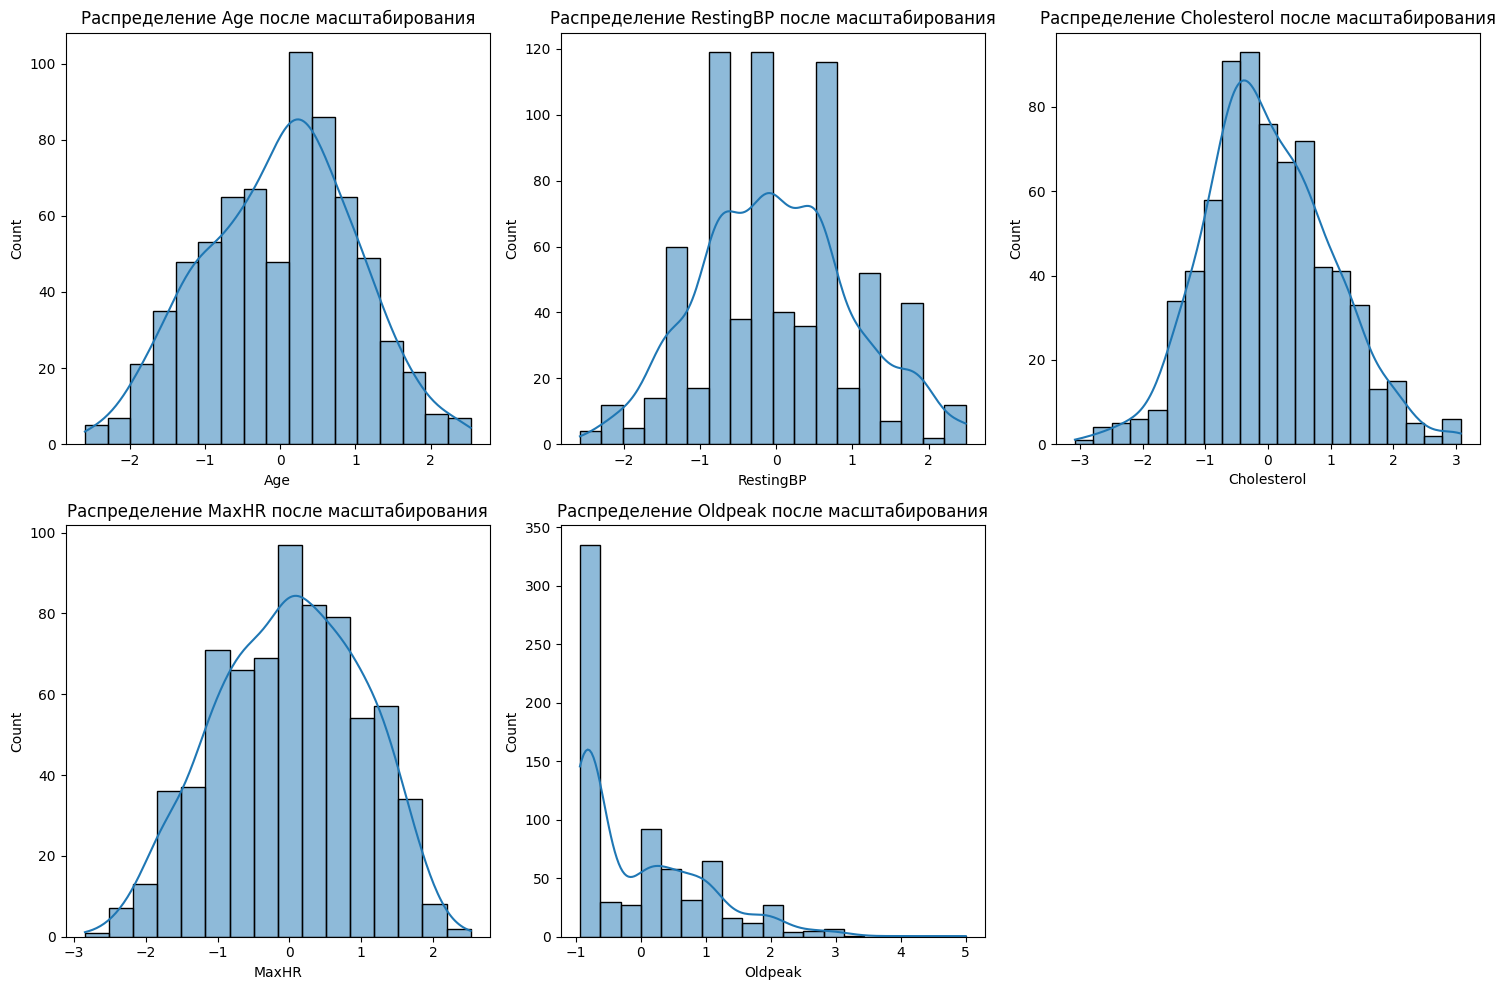

In [18]:
# Обоснование: Стандартизация улучшает работу алгоритмов ML
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

# Визуализация после масштабирования
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'Распределение {feature} после масштабирования')
plt.tight_layout()
plt.show()

#5. Кодирование категориальных признаков

In [19]:
# Преобразование категориальных признаков
# Бинарные признаки
df_clean['Sex'] = df_clean['Sex'].map({'F': 0, 'M': 1})
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'N': 0, 'Y': 1})

# Порядковый признак (Label Encoding)
st_slope_mapping = {'Flat': 1, 'Up': 2, 'Down': 0}
df_clean['ST_Slope'] = df_clean['ST_Slope'].map(st_slope_mapping)

# One-Hot Encoding для номинальных признаков
nominal_features = ['ChestPainType', 'RestingECG']
df_clean = pd.get_dummies(df_clean, columns=nominal_features, drop_first=True)

# Проверка исключения дамми-ловушки
print("\nПроверка дамми-ловушки:")
print("ChestPainType features:", [col for col in df_clean.columns if 'ChestPainType' in col])
print("RestingECG features:", [col for col in df_clean.columns if 'RestingECG' in col])


Проверка дамми-ловушки:
ChestPainType features: ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']
RestingECG features: ['RestingECG_Normal', 'RestingECG_ST']


#6. Финальный набор данных


=== ФИНАЛЬНЫЙ ДАТАСЕТ ===
Размер данных: (713, 15)
Типы данных:
Age                  float64
Sex                    int64
RestingBP            float64
Cholesterol          float64
FastingBS              int64
MaxHR                float64
ExerciseAngina         int64
Oldpeak              float64
ST_Slope               int64
HeartDisease           int64
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
dtype: object
Пропуски: 0
Категориальные данные: 0

Первые 5 строк финального датасета:


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,-1.341598,1,0.541580,0.984601,0,1.295650,0,-0.838056,2,0,True,False,False,True,False
1,-0.398865,0,1.838897,-1.187295,0,0.639339,0,0.103684,1,1,False,True,False,True,False
2,-1.655842,1,-0.107079,0.865047,0,-1.739787,0,-0.838056,2,0,True,False,False,False,True
3,-0.503613,0,0.411848,-0.509823,0,-1.329593,1,0.574554,1,1,False,False,False,True,False
4,0.124875,1,1.190239,-0.888410,0,-0.755321,0,-0.838056,2,0,False,True,False,True,False


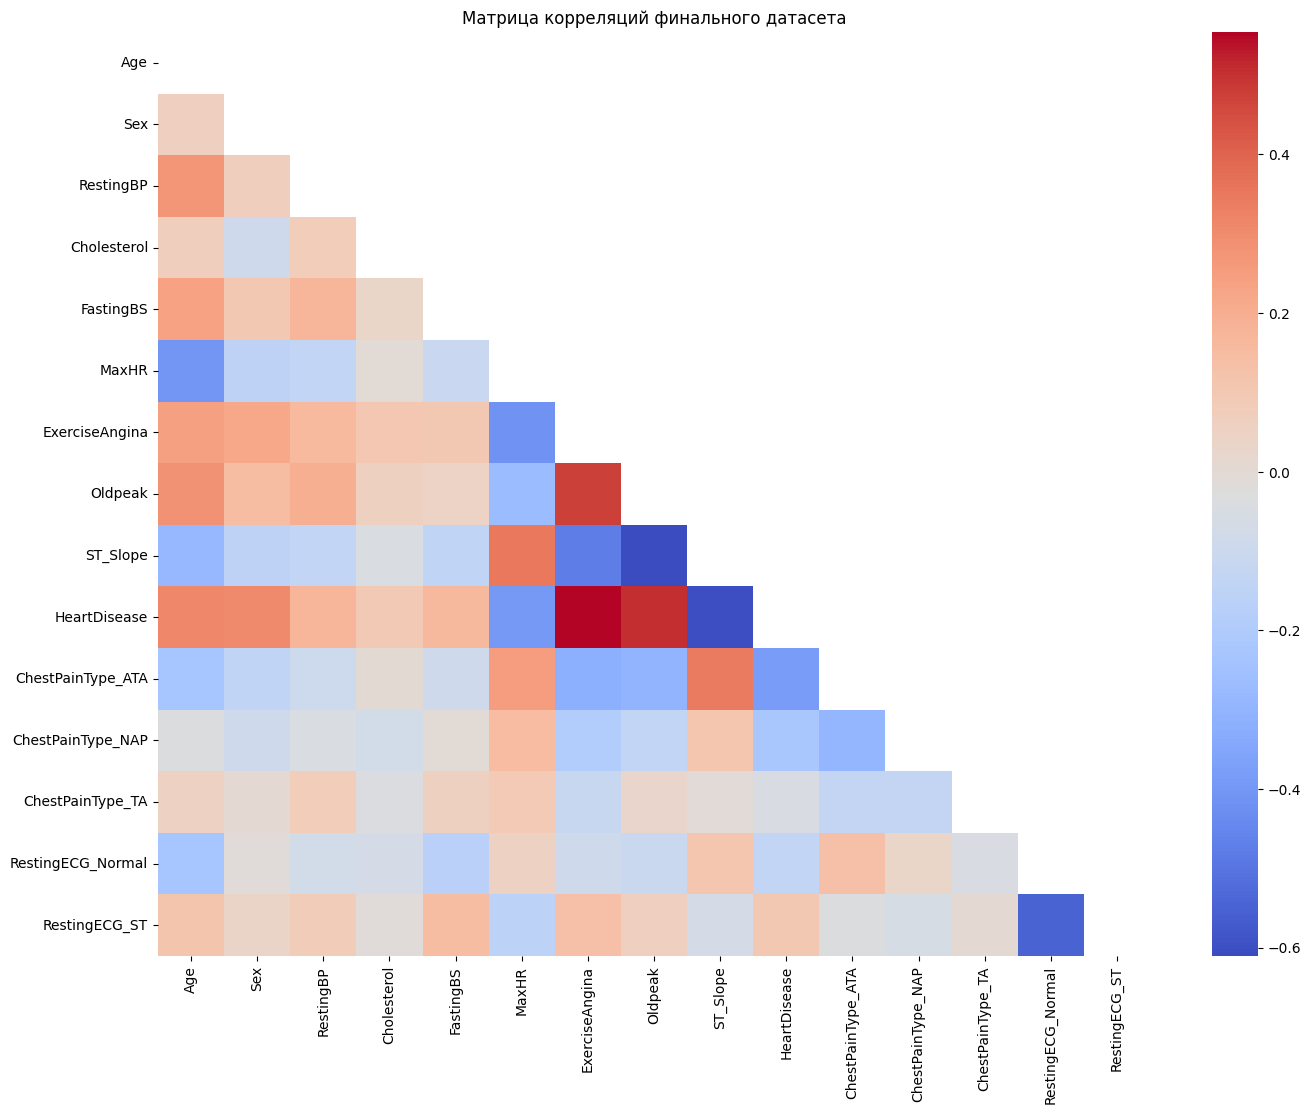

In [20]:
# Проверка финального датасета
print("\n=== ФИНАЛЬНЫЙ ДАТАСЕТ ===")
print(f"Размер данных: {df_clean.shape}")
print(f"Типы данных:\n{df_clean.dtypes}")
print(f"Пропуски: {df_clean.isnull().sum().sum()}")
print(f"Категориальные данные: {sum(df_clean.dtypes == 'object')}")

# Первые 5 строк
print("\nПервые 5 строк финального датасета:")
display(df_clean.head())

# Визуализация корреляций
plt.figure(figsize=(16, 12))
corr = df_clean.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm',
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Матрица корреляций финального датасета')
plt.show()

# Сохранение результата
df_clean.to_csv('heart_disease_processed.csv', index=False)